### Fine-tuning of T5-BASE for Summarization

Installing necessary modules

In [ ]:
!pip install torch==1.13.1+cu116 torchvision==0.14.1+cu116 torchaudio==0.13.1 torchtext==0.14.1 torchdata==0.5.1 --extra-index-url https://download.pytorch.org/whl/cu116 -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu116
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 GB 843.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 92.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 92.7 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0+cu118
    Uninstalling torch-2.0.0+cu118:
      Successfully uninstalled torch-2.0.0+cu118
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.15.1+cu118
    Uninstalling torchvision-0.15.1+cu118:
      Successfully uninstalled torchvision-0.15.1+cu118
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.15.1
    Uninstalling tor

In [ ]:
# Installing the BLURR library and Bert-Score package

!pip install ohmeow-blurr -q
!pip install bert-score -q
!pip install wandb
!pip install sacrebleu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 92.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Import modules

In [ ]:
import pandas as pd
from fastai.text.all import *
from transformers import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *
from fastai.callback.wandb import *

/usr/local/lib/python3.9/dist-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/transformers/generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/transformers/generation_flax_utils.py:24: FutureWarning: Importing `FlaxGenerationMixin` from `src/transformers/generation_flax_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import FlaxGenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/blurr/text/modeling/question_answering.py:31:

Load and process data

In [ ]:
# Load the dataset from Hugging Face

from datasets import load_dataset
dataset = load_dataset('ccdv/pubmed-summarization')

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset pubmed-summarization downloaded and prepared to /root/.cache/huggingface/datasets/ccdv___pubmed-summarization/section/1.0.0/f765ec606c790e8c5694b226814a13f1974ba4ea98280989edaffb152ded5e2b. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
train_data = pd.DataFrame(dataset['train'])

In [ ]:
# Preprocess and taking first 1000 samples.

train_data['article'] = train_data['article'].apply(lambda x: x.replace('\n',''))
train_data['article'] = train_data['article'].apply(lambda x: "summarize: "+ x)
train_data = train_data.head(1000)
train_data.shape

(1000, 2)

Import pre-trained T5-BASE model

In [ ]:
#Import the pretrained model
pretrained_model_name = "t5-base"
hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(pretrained_model_name, 
                                                                  model_cls=T5ForConditionalGeneration)

/usr/local/lib/python3.9/dist-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


Removing **prefix**, as in Inference time, we do not need the prefix. 


Note: In above cell, we manually added the prefix to the input sentences.

In [ ]:
model_hf_config = hf_config.to_dict()
del model_hf_config["task_specific_params"]["summarization"]["prefix"]
hf_config = T5Config.from_dict(model_hf_config)

Defining preprocessor

In [ ]:
preprocessor = SummarizationPreprocessor(
    hf_tokenizer,
    id_attr="id",
    text_attr="article",
    target_text_attr="abstract",
    max_input_tok_length=1024,
    max_target_tok_length=256,
    min_summary_char_length=30
)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

proc_df = preprocessor.process_df(train_data)

In [ ]:
text_gen_kwargs = default_text_gen_kwargs(hf_config, hf_model, task="summarization")

batch_tokenize_transform = Seq2SeqBatchTokenizeTransform(
  hf_arch, hf_config, hf_tokenizer, hf_model, text_gen_kwargs=text_gen_kwargs
)

blocks = (Seq2SeqTextBlock(batch_tokenize_tfm = batch_tokenize_transform), noop)
dblock = DataBlock(blocks=blocks, get_x=ColReader( "proc_article"), get_y=ColReader("proc_abstract" ),
splitter=RandomSplitter())

In [ ]:
dls = dblock.dataloaders(proc_df, bs=2)

In [ ]:
summarization_metrics = {
  "rouge": {
      "compute_kwargs": {"rouge_types" : ["rouge1", "rouge2", "rougeL"],
          "use_stemmer": True
      },
      "returns": ["rouge1", "rouge2", "rougeL"],
  },
  "bertscore": {"compute_kwargs": {"lang" : "en"},
  "returns": ["precision", "recall", "f1"]
  },
  "bleu": {"returns": "bleu"},
  "meteor" : {"returns": "meteor"},
  "sacrebleu": {"returns" : "score"}
}

Defining learner to fine-tune the model

In [ ]:
model = BaseModelWrapper(hf_model) 
learn_cbs = [BaseModelCallback]

fit_cbs = [Seq2SeqMetricsCallback(custom_metrics = summarization_metrics, calc_every="epoch")]

learn = Learner(
  dls,
  model, 
  opt_func=partial(Adam),
  loss_func=PreCalculatedCrossEntropyLoss(),
  cbs=learn_cbs,
  splitter=partial(blurr_seq2seq_splitter, arch=hf_arch),
)

learn = learn.to_fp16()
learn.freeze()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Optimal Learning Rate

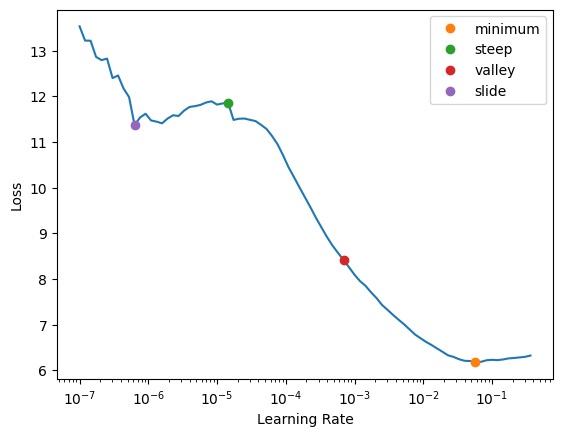

In [ ]:
res = learn.lr_find(suggest_funcs=[minimum, steep, valley, slide])

In [ ]:
# Optimal Learning Rate
res.valley

0.0006918309954926372

Training the model

In [ ]:
df = learn.fit_one_cycle(10, lr_max=res.valley, cbs=fit_cbs)

epoch,train_loss,valid_loss,rouge1,rouge2,rougeL,bertscore_precision,bertscore_recall,bertscore_f1,bleu,meteor,sacrebleu,time
0,nan,2.467418,0.332780,0.111313,0.195036,0.843032,0.834636,0.838585,0.139370,0.214929,8.646840,12:42
1,nan,2.431188,0.348436,0.112631,0.199026,0.846191,0.837066,0.841469,0.150955,0.228501,9.223380,13:02
2,nan,2.439043,0.351002,0.112872,0.200996,0.843038,0.839702,0.841269,0.159868,0.234607,9.724131,13:16
3,nan,2.451146,0.361454,0.115589,0.204524,0.842096,0.842129,0.842010,0.169858,0.241429,9.870404,13:18
4,nan,2.507664,0.357788,0.112963,0.201659,0.842066,0.841627,0.841749,0.167837,0.243038,9.936289,12:51
5,nan,2.554753,0.359410,0.112335,0.203181,0.844701,0.841704,0.843097,0.163986,0.240770,9.667806,12:57
6,nan,2.664665,0.360310,0.113160,0.205364,0.843711,0.842509,0.843019,0.167795,0.241849,9.988806,13:03
7,nan,2.771976,0.361710,0.112629,0.205443,0.844272,0.842668,0.843375,0.167724,0.241942,10.023352,12:57
8,nan,2.861146,0.358232,0.109828,0.201821,0.843528,0.841410,0.842368,0.163607,0.240100,9.679606,12:55
9,nan,2.884995,0.359072,0.111953,0.202538,0.842880,0.841758,0.842223,0.164216,0.240898,9.761475,13:01


Sample output

In [ ]:
res = learn.show_results(learner=learn)

,text,target,prediction
0,"summarize: reflection is growing in importance as a means to promote a learner - centered environment where the learner is encouraged to learn through the practice of nursing with subsequent reflection. when students are in uncertain new situations, they are expected to use focused thought to apply learned principles to clinical situations and critically evaluate their performance and decisions, rather than focusing on technical knowledge in isolation. the national league for nursing has reiterated the importance of both reflective and critical thinking through their designation as core competencies for nurse educators. clinical journals are one of the strategies used throughout the undergraduate nursing curricula to facilitate and guide students'reflective thinking processes. reflective journals are considered by ( most ) faculty members to be essential in fostering an understanding of course concepts and application of concepts to clinical practice ; however, students continually question their worth in their anecdotal comments and in formal student course evaluations. is student dissatisfaction based on reflective journaling in general, the format within an individual course or modality, or some other characteristic of the individual student? it is possible that reflective journals are not consistently reaching the anticipated critical reflection / thinking outcomes that are desired for all students. the purposes of the study were to determine ( a ) the critical attributes of a reflective journal and relative levels of each attribute, ( b ) the relative importance of each attribute as perceived by the students, and ( c ) the perception of relative importance for student subgroups. the reflective learning process for one entering a profession, particularly one entering the health care field, is a very personal experience. the day - to - day experiences in the clinical setting often challenge strongly held beliefs. educators rightfully focus on developing learning tools that include reflection on learned course content, on clinical experiences, on personal values and on their role as the novice nurse. at the foundation of the journaling process reflection, via journal writing, has been an integral component of clinical learning for many years. most educators agree that reflective journaling is valuable and contributes to learning ; however, they do not agree on how best to structure the reflective journal and if the format of the journal should vary for different student subgroups. first, journaling can be viewed as a transformative learning tool for the nursing instructor, challenging the attitudes","this study used a statistical technique, conjoint value analysis, to determine student perceptions related to the importance of predetermined reflective journaling attributes. an expert delphi panel determined these attributes and integrated them into a survey which presented students with multiple journaling experiences from which they had to choose. after obtaining irb approval, a convenience sample of 66 baccalaureate nursing students completed the survey. the relative importance of the attributes varied from a low of 16.75% ( format ) to a high of 23.58% ( time ). the model explained 77% of the variability of student journaling preferences ( r2 = 0.77 ). students preferred shorter time, complete confidentiality, one - time complete feedback, semistructured format, and behavior recognition. students with more experience had a much greater preference for a free - form format ( p .05 ) when compared to students with less journaling experience. additionally, the results of english as a second language students were significantly different from the rest of the sample. in order to better serve them, educators must consider","[background : reflective journaling has become an integral part of the nursing learning process for many years . the purpose of the study was to determine the critical attributes of 

Saving the model

In [ ]:
learn.metrics = None
learn = learn.to_fp32()
learn.export(fname="cnn_summary_export.pkl")